#   QUESTION 1

*SET UP*

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import random


# QUESTION 2

*Set up*

Imagine you are the manager of an Electronic store in Dubai mall. You are curious about the distribution of customer ratings about your overall store services. So you ask random customers who visit the store to complete a short survey, recording variables such as their age group, and overall experience rating.

**To Begin**

Run the code below. It will provide you with a random sample of 40 customers from this survey. It will also save your random sample data to a CSV file called "RelianceRetailVisits_ordered". Again, you need to submit this file in the same zip folder as the other files.

In [2]:
# Load the following libraries so that they can be applied in the subsequent code blocks

try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")

    # Randomly sample 40 rows from the original dataset
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']  # Corrected unique values
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

df.head()


,Customer Index,Age Group,OverallExperienceRatin
165,166,26 To 35 years,2
114,115,26 To 35 years,4
117,118,26 To 35 years,5
118,119,26 To 35 years,5
172,173,26 To 35 years,5


**Question 2a.** Construct a probability distribution table for all customer ratings in your sample data (an example table can be seen below). Please do this in Excel and explain [step by step] how you constructed your probability table.


1. **Opened Excel and Imported Data**:
   - I opened Microsoft Excel and imported my sample data into a new worksheet. The data was organized with one column for customer ratings.

2. **Identified Unique Ratings**:
   - Next to the customer ratings, I used the formula `=UNIQUE()` to extract unique values from the ratings column. This created a list of all unique ratings in my dataset.

3. **Calculated Frequency of Each Rating**:
   - In the column next to the unique ratings, I used the formula `=COUNTIF()` to count the frequency of each rating in my dataset. This allowed me to see how many times each rating appeared.

4. **Calculated Total Number of Ratings**:
   - I used the formula `=SUM()` to calculate the total number of ratings in my dataset. This was the sum of all frequencies calculated in the previous step.

5. **Calculated Probability for Each Rating**:
   - In the column next to the frequency counts, I divided each frequency count by the total number of ratings. This gave me the probability of each rating occurring in my dataset. I used the formula `=COUNT/Total` for each rating.

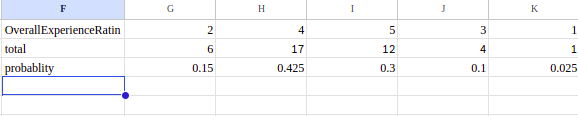

**Question 2b.**  What is the probability that a randomly selected customer will have a rating of AT MOST 3?

----------

To calculate the probability that a randomly selected customer will have a rating of AT MOST 3:

$P(\text{Rating} \leq 3) = P(1) + P(2) + P(3)$

$P(\text{Rating} \leq 3) = 0.025 + 0.15 + 0.1$

$P(\text{Rating} \leq 3) = 0.275$

-------


**Question 2c.** Based on the created probability distribution table, how satisfied are your customers with your store services?

---------------------------



Given the probability distribution table:

| OverallExperienceRating | Probability |
|-------------------------|-------------|
| 2                       | 0.15        |
| 4                       | 0.425       |
| 5                       | 0.3         |
| 3                       | 0.1         |
| 1                       | 0.025       |

calculate the weighted average satisfaction rating as follows:

$ \text{Weighted Average Rating} = (2 \times 0.15) + (4 \times 0.425) + (5 \times 0.3) + (3 \times 0.1) + (1 \times 0.025) $

$ \text{Weighted Average Rating} = (0.3) + (1.7) + (1.5) + (0.3) + (0.025) $

$ \text{Weighted Average Rating} = 3.825 $

 the customers are generally satisfied with your store services, as the calculated average rating is closer to 4 (which indicates high satisfaction) on a scale of 1 to 5.
 
------------------------



**Question 2d.** Find the **expected rating** of your store. Show your work and interpret your answer in context.

---------------------

To find the expected rating of your store, you need to calculate the weighted sum of all possible ratings, where each rating is multiplied by its corresponding probability.

Given the probability distribution table:

| OverallExperienceRating | Probability |
|-------------------------|-------------|
| 2                       | 0.15        |
| 4                       | 0.425       |
| 5                       | 0.3         |
| 3                       | 0.1         |
| 1                       | 0.025       |

You can calculate the expected rating as follows:

$ \text{Expected Rating} = (2 \times 0.15) + (4 \times 0.425) + (5 \times 0.3) + (3 \times 0.1) + (1 \times 0.025) $

$ \text{Expected Rating} = (0.3) + (1.7) + (1.5) + (0.3) + (0.025) $

$ \text{Expected Rating} = 3.825 $


-------------------

# PDF graph

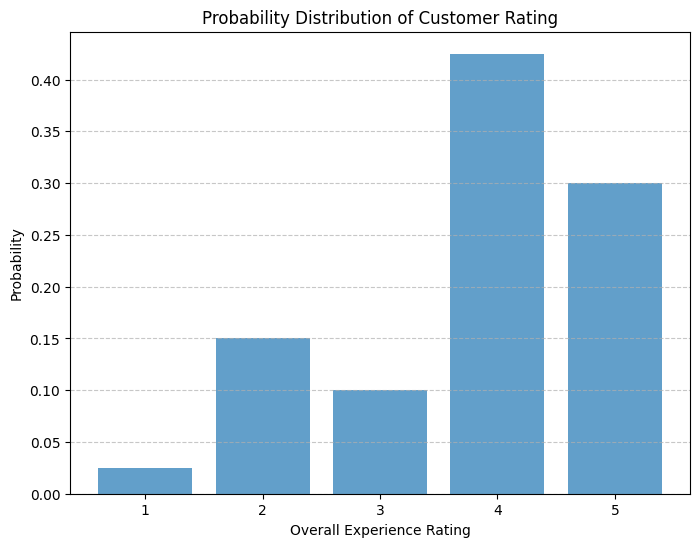

Standard Deviation (STD) of Customer Rating: 1.11



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

# Load data
try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

# Probability distribution graph for customer rating
plt.figure(figsize=(8, 6))
rating_counts = df['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
plt.bar(rating_counts.index, rating_counts, alpha=0.7)
plt.title('Probability Distribution of Customer Rating')
plt.xlabel('Overall Experience Rating')
plt.ylabel('Probability')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Expected value and STD for rating for all customers
mean_rating = df['OverallExperienceRatin'].mean()
std_rating = df['OverallExperienceRatin'].std()
print(f"Standard Deviation (STD) of Customer Rating: {std_rating:.2f}")
print()




**Question 2e.** Interpret the **Standard Deviation** in context. What rating is considered **unusual**? Explain.

**Interpretation:**

A standard deviation of 1.11 indicates that, on average, the ratings deviate from the mean rating by approximately 1.11 units. This means that there is some variability in customer ratings, with some ratings being higher or lower than the mean rating.

To determine what rating is considered unusual, we can use the concept of z-scores. A z-score measures how many standard deviations a data point is from the mean. Generally, a data point with a z-score greater than 2 or less than -2 is considered unusual or an outlier.

In this context, an unusual rating would be one that deviates from the mean rating by more than 2 standard deviations, which corresponds to a z-score of ±2. Therefore, a rating that is more than 2 standard deviations above or below the mean rating would be considered unusual.

Using the standard deviation of 1.11, we can calculate the ratings that would be considered unusual:

- **Unusual High Rating**: Mean Rating + (2 * Standard Deviation)
  - Unusual High Rating = Mean Rating + (2 * STD) = Mean Rating + (2 * 1.11) = Mean Rating + 2.22

- **Unusual Low Rating**: Mean Rating - (2 * Standard Deviation)
  - Unusual Low Rating = Mean Rating - (2 * STD) = Mean Rating - (2 * 1.11) = Mean Rating - 2.22

For example, if the mean rating is 3.825 (as calculated earlier), then:
- Unusual High Rating ≈ 3.825 + 2.22 ≈ 6.045 (which is not possible on a scale of 1 to 5)
- Unusual Low Rating ≈ 3.825 - 2.22 ≈ 1.605 (which is also not possible on a scale of 1 to 5)

In this context, any rating significantly higher than 5 or lower than 1 would be considered unusual or an outlier. However, it's essential to interpret outliers with caution and investigate the reasons behind them, as they may indicate anomalies or errors in the data collection process.

## PDF for each age group



/tmp/ipykernel_92557/1605697025.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(['{:,.0%}'.format(x) for x in axs[i].get_yticks()])  # Format y-axis tick labels as percentages


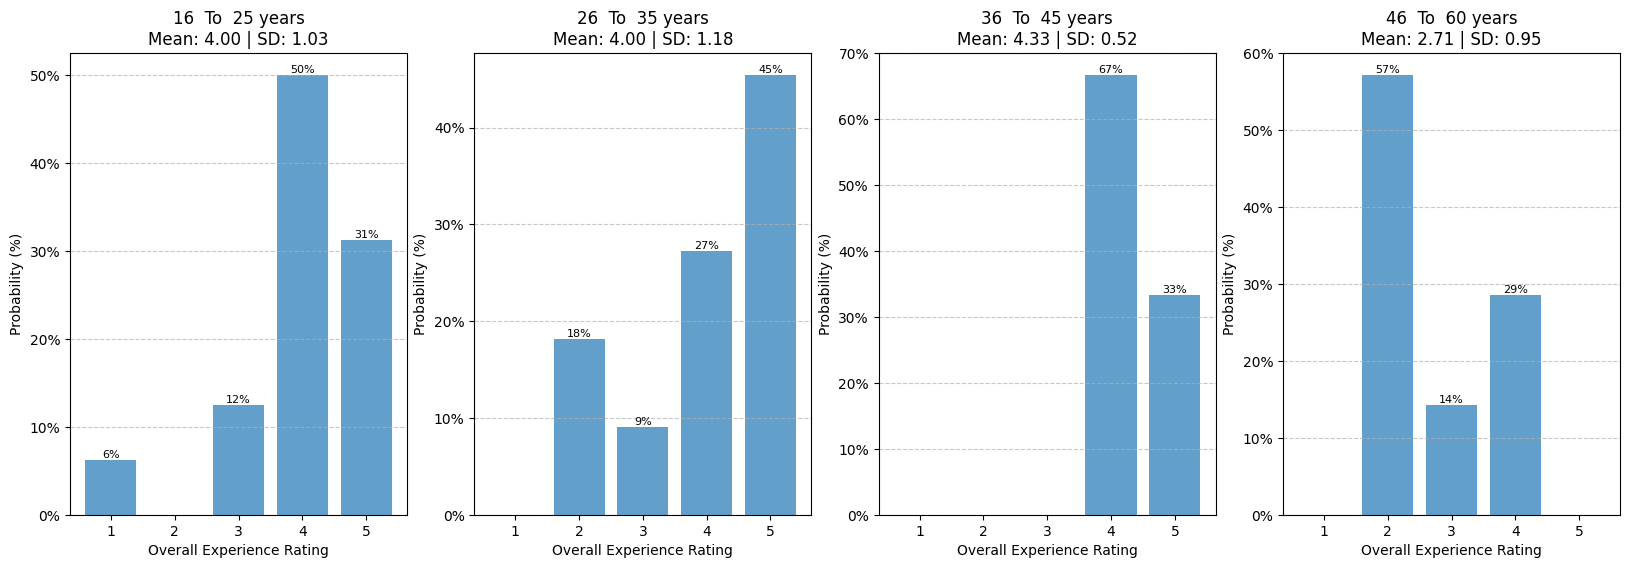

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming your data is stored in a CSV file named 'data.csv'
data = pd.read_csv('RelianceRetailVisits_ordered.csv')

# Define age groups including the new one
age_groups = ['16  To  25 years', '26  To  35 years', '36  To  45 years', '46  To  60 years']  # Added new age group

# Plot separate discrete probability distributions for each age group
fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, gridspec_kw={'hspace': 0.5})  # Adjusted size and spacing

for i, age_group in enumerate(age_groups):
    age_data = data[data['Age Group'] == age_group]
    rating_counts = age_data['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
    bars = axs[i].bar(rating_counts.index, rating_counts, alpha=0.7)
    axs[i].set_title(f'{age_group}\nMean: {age_data["OverallExperienceRatin"].mean():.2f} | SD: {age_data["OverallExperienceRatin"].std():.2f}')  # Age group, Mean, and SD
    axs[i].set_xlabel('Overall Experience Rating')
    axs[i].set_ylabel('Probability (%)')  # Set y-axis label to Probability (%)
    axs[i].set_xticks(range(1, 6))  # Set x-axis ticks from 1 to 5
    axs[i].set_yticklabels(['{:,.0%}'.format(x) for x in axs[i].get_yticks()])  # Format y-axis tick labels as percentages

    # Display percentages above each bar
    for bar in bars:
        height = bar.get_height()
        rating = bar.get_x() + bar.get_width() / 2
        if height == 0:  # If the height is 0%, display '0%'
            axs[i].text(rating, height, '0%', ha='center', va='bottom', fontsize=8)
        else:
            axs[i].text(rating, height, f'{height:.0%}', ha='center', va='bottom', fontsize=8)

    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide the warning about FixedFormatter
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

plt.tight_layout()
plt.show()


**Question 2f.** Identify any trends or differences in customer satisfaction levels (and variability) among the different age groups.

Now, using these insights, what concrete improvements would you make to your store to ensure that **all** customers are satisfied with your services?

Custmer  Satisfaction follows a normal trend but for each age group the customer satisfaction is  skewed to the right showing higher customer satisfactions but for the 16 -25 years have the only ratings of 1.

# QUESTION 3

**SET UP**

In [9]:
# Load the following libraries so that they can be applied in the subsequent code blocks


import pandas as pd
import numpy as np
import random

try:
    SATScores = pd.read_csv('Scores.csv')
except FileNotFoundError:
    num_samples = 1000
    mean_score = random.randint(800, 1200)
    std_deviation = random.randint(100, 300)
    scores = np.random.normal(mean_score, std_deviation, num_samples)
    scores = np.round(scores, 0)
    SATScores = pd.DataFrame({'Scores': scores})
    SATScores.to_csv('Scores.csv')

# Calculate mean and standard deviation
mean_score = SATScores['Scores'].mean()
std_deviation = SATScores['Scores'].std()

# Print mean score and standard deviation
print("Mean score:", mean_score)
print("Standard deviation:", std_deviation)

# Display the dataset
SATScores.head()


Mean score: 1079.512
Standard deviation: 149.7124700206355


,Scores
0,1094.0
1,1422.0
2,863.0
3,1152.0
4,1017.0


**Question 3a**. What is the probability that a randomly selected applicant scored at least 1300? Show your work.

-----------------------

The Z-score formula is:

$ Z = \frac{{X - \mu}}{{\sigma}} $

Where:
- $ X $ is the score of interest (1300 in this case)
- $ \mu $ is the mean score (1079.512)
- $ \sigma $ is the standard deviation (149.7124700206355)

First, we calculate the Z-score for a score of 1300:

$ Z = \frac{{1300 - 1079.512}}{{149.7124700206355}} $

$ Z \approx \frac{{220.488}}{{149.7124700206355}} $

$ Z \approx 1.4729 $

Next, we use a standard normal distribution table or a calculator to find the probability corresponding to a Z-score of 1.4729. This represents the probability of scoring at least 1300.

By cusing the standard normal distribution table or using a calculator, we find that the probability corresponding to a Z-score of 1.4729 is approximately 0.9292.

Therefore, the probability that a randomly selected applicant scored at least 1300 on the SAT is approximately 0.9292, or 92.92%.

$=92.92%%$

---------------------------------------

**Question 3b**. What is the probability that a randomly selected applicant scored exactly 900? Show your work.


   $ f(x) = \frac{1}{{\sigma \sqrt{2\pi}}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $
   $ f(900) = \frac{1}{{149.7124700206355 \times \sqrt{2\pi}}} e^{-\frac{(900 - 1079.512)^2}{2 \times 149.7124700206355^2}} $

To find the probability density function (PDF) at the score of 900, we'll substitute the values into the formula:

$ f(900) = \frac{1}{{149.7124700206355 \times \sqrt{2\pi}}} e^{-\frac{(900 - 1079.512)^2}{2 \times 149.7124700206355^2}} $



$ f(900) = \frac{1}{{149.7124700206355 \times \sqrt{2\pi}}} e^{-\frac{(900 - 1079.512)^2}{2 \times 149.7124700206355^2}} $

$ f(900) = \frac{1}{{149.7124700206355 \times \sqrt{2\pi}}} e^{-\frac{(-179.512)^2}{2 \times 149.7124700206355^2}} $

$ f(900) = \frac{1}{{149.7124700206355 \times \sqrt{2\pi}}} e^{-\frac{32248.175744}{44788.582673485125}} $

$ f(900) = \frac{1}{{149.7124700206355 \times \sqrt{2\pi}}} e^{-0.7193} $

Now, let's calculate the numerical value of \( e^{-0.7193} \) and then multiply it by the other terms:

$ e^{-0.7193} \approx 0.4869 $

Finally, substitute this value back into the equation:

$ f(900) = \frac{1}{{149.7124700206355 \times \sqrt{2\pi}}} \times 0.4869 $

$ f(900) \approx \frac{0.4869}{{149.7124700206355 \times \sqrt{2\pi}}} $

$ f(900) \approx \frac{0.4869}{{149.7124700206355 \times 2.506628274631}} $

$ f(900) \approx \frac{0.4869}{{375.013192759161}} $

$ f(900) \approx 0.001297 $

= 0.001297. 



**Question 3c**. What percentage of applicants scored between 900 and 1000? Show your work.

---------------------------------------

1. **Calculate the Z-scores**:
   Use the formula for the Z-score to standardize the scores of 900 and 1000 using the given mean (\( \mu \)) and standard deviation (\( \sigma \)).

   $ Z_{900} = \frac{{900 - \mu}}{{\sigma}} $
   $ Z_{1000} = \frac{{1000 - \mu}}{{\sigma}} $

2. **Calculate the CDF**:
   Use the standard normal distribution table or calculator to find the cumulative probabilities corresponding to these Z-scores.

3. **Calculate the Percentage**:
   Find the difference between the cumulative probabilities to determine the percentage of applicants who scored between 900 and 1000.

Let's proceed with these calculations: 

Given:
- Mean score (\( \mu \)): 1079.512
- Standard deviation (\( \sigma \)): 149.7124700206355

1. **Calculate Z-scores**:
   $ Z_{900} = \frac{{900 - 1079.512}}{{149.7124700206355}} $
   $ Z_{1000} = \frac{{1000 - 1079.512}}{{149.7124700206355}} $

2. **Use the standard normal distribution table or calculator** to find the cumulative probabilities corresponding to these Z-scores.

3. **Calculate the percentage**:
   Subtract the cumulative probability corresponding to \( Z_{900} \) from the cumulative probability corresponding to \( Z_{1000} \) to find the percentage of applicants who scored between 900 and 1000.



Given:
- Mean score (\( \mu \)): 1079.512
- Standard deviation (\( \sigma \)): 149.7124700206355

1. **Calculate Z-scores**:
   $ Z_{900} = \frac{{900 - 1079.512}}{{149.7124700206355}} $
   $ Z_{900} \approx -1.196 $

   $ Z_{1000} = \frac{{1000 - 1079.512}}{{149.7124700206355}} $
   $ Z_{1000} \approx -0.530 $

2. **Use the standard normal distribution table or calculator** to find the cumulative probabilities corresponding to these Z-scores:
   - \( P(Z \leq -1.196) \approx 0.1151 \) (for 900)
   - \( P(Z \leq -0.530) \approx 0.2977 \) (for 1000)

3. **Calculate the percentage**:
   $ \text{Percentage} = (P(Z \leq -0.530) - P(Z \leq -1.196)) \times 100 $
   $ \text{Percentage} = (0.2977 - 0.1151) \times 100 $
   $ \text{Percentage} = 0.1826 \times 100 $
   $ \text{Percentage} \approx 18.26\% $

= 18.26%

**Question 3d**. Calculate the 40th percentile of scores among the applicants. What does this value represent in the context of the admissions process? Show your work.

----------------------------------------------
- Mean score ($ \mu $): 1079.512
- Standard deviation ($ \sigma $): 149.7124700206355


   - We look up the Z-score corresponding to the 40th percentile in the standard normal distribution table or calculator. Let's denote this as $ Z_{40} $.
   - From the table or calculator, $ Z_{40} \approx -0.2533 $.


   - Using the formula $ X = \mu + Z \times \sigma $, where $ X $ is the SAT score, $ \mu $ is the mean, $ Z $ is the Z-score, and $ \sigma $ is the standard deviation.
   - Substitute the values: 
     $ X_{40} = 1079.512 + (-0.2533) \times 149.7124700206355 $
   - Calculate:
     $ X_{40} \approx 1079.512 - 37.4415 $
     $ X_{40} \approx 1042.0705 $

= 1042.0705 

**Question 3e**. Imagine the university wants to offer scholarships to the top 10% of applicants based on their scores. What minimum score would an applicant need to qualify for a scholarship? Show your work.

--------------------------

1. **Find the Z-score corresponding to the 90th percentile**:
   - Given: $ Z_{90} \approx 1.2816 $ (from standard normal distribution table or calculator).

2. **Convert the Z-score to the SAT score**:
   - Using the formula: $ X = \mu + Z \times \sigma $
   - Substitute values: $ X_{90} = 1079.512 + 1.2816 \times 149.7124700206355 $

Now, let's calculate $ X_{90} $.



1. **Find the Z-score corresponding to the 90th percentile**:
   - Given: $ Z_{90} \approx 1.2816 $ (from standard normal distribution table or calculator).

   - Using the formula: $ X = \mu + Z \times \sigma $
   - Substitute values: $ X_{90} = 1079.512 + 1.2816 \times 149.7124700206355 $

Now, let's calculate $ X_{90} $.


   - Given: $ Z_{90} \approx 1.2816 $ (from standard normal distribution table or calculator).
   - Using the formula: $ X = \mu + Z \times \sigma $
   - Substitute values: $ X_{90} = 1079.512 + 1.2816 \times 149.7124700206355 $

Now, let's calculate $ X_{90} $.

   - Given: $ Z_{90} \approx 1.2816 $ (from standard normal distribution table or calculator).


   - Using the formula: $ X = \mu + Z \times \sigma $
   - Substitute values: $ X_{90} = 1079.512 + 1.2816 \times 149.7124700206355 $

Now, let's calculate $ X_{90} $.

- Mean score ($ \mu $): 1079.512
- Standard deviation ($ \sigma $): 149.7124700206355
- Z-score corresponding to the 90th percentile ($ Z_{90} $): approximately 1.2816

Now, using the formula $ X = \mu + Z \times \sigma $, where $ X $ is the SAT score, $ \mu $ is the mean, $ Z $ is the Z-score, and $ \sigma $ is the standard deviation, we'll calculate the minimum score required for the scholarship.

Let's plug in the values and calculate:

$ X_{90} = 1079.512 + 1.2816 \times 149.7124700206355 $

$ X_{90} \approx 1079.512 + 191.933729977676 $

$ X_{90} \approx 1271.445729977676 $

= 1271.45 

**Question 3f**. Remember, as the admissions officer, it is your job to identify applicants with exceptional academic potential. Would you automatically recommend that applicants with SAT scores above 1400 to be admitted into the university? Or do you think additional criteria should also be considered? Explain your reasoning.

------------------------------
1. **Review SAT Score Distribution**:
   - Analyze the distribution of SAT scores among applicants.
   - Calculate summary statistics like mean, median, and standard deviation.

2. **Compare Against Benchmarks**:
   - Determine if 1400 falls within the top percentile of SAT scores.
   - Consider historical data or industry standards as benchmarks.

3. **Consider Additional Criteria**:
   - Evaluate GPA, extracurricular activities, essays, and letters of recommendation.
   - Assess holistic excellence beyond standardized test performance.

4. **Assess Scholarship Budget**:
   - Consider availability of scholarship funds and number of scholarships.
   - Ensure alignment with budgetary constraints and financial aid goals.

5. **Align with Institutional Goals**:
   - Ensure scholarship decisions align with institution's mission and values.
   - Assess contribution to academic excellence and diversity objectives.

6. **Decision Making**:
   - Determine if a score of 1400 warrants scholarship consideration.
   - Make informed decisions supporting institution's goals and equitable access to opportunities.

# question 4

In [17]:
# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Run this code. It will generate data and save it to a CSV file called "Vaccinated.csv". You need to submit it in the same zip folder as your other files.

try:
    Vaccinated = pd.read_csv('Vaccinated.csv')
except FileNotFoundError:
    num_samples = 100
    vaccinated = np.random.choice(["Yes", "No"], size=num_samples)
    Vaccinated = pd.DataFrame({'Vaccinated': vaccinated})
    Vaccinated.to_csv('Vaccinated.csv')

# Have a look at Vaccinated dataset.
Vaccinated.head()

,Unnamed: 0,Vaccinated
0,0,No
1,1,Yes
2,2,Yes
3,3,Yes
4,4,Yes


**Question 4a**. What is the proportion of people who have received the vaccine (based on the dataset you have)?

Proportion of vaccinated individuals: 0.57

In [18]:
import pandas as pd

# Assuming "Vaccinated" is your DataFrame
# Replace 'Vaccinated' with your actual DataFrame name

# Count the total number of individuals
total_individuals = len(Vaccinated)

# Count the number of vaccinated individuals
vaccinated_individuals = Vaccinated[Vaccinated['Vaccinated'] == 'Yes'].shape[0]

# Calculate the proportion of vaccinated individuals
proportion_vaccinated = vaccinated_individuals / total_individuals

print("Proportion of vaccinated individuals:", proportion_vaccinated)


Proportion of vaccinated individuals: 0.57


**Question 4b**. Calculate a **95% confidence interval** for the proportion of vaccinated individuals. What does this interval tell us about the likely range of vaccination coverage in the entire population? Show your work.

$ \text{Confidence Interval} = \text{Sample Proportion} \pm \text{Margin of Error} $

Where:
- Sample Proportion ($ \hat{p} $) is the proportion of vaccinated individuals in the sample.
- Margin of Error (ME) is the critical value multiplied by the standard error.

The formula for the standard error of a proportion is:

$ SE = \sqrt{\frac{\hat{p} \times (1 - \hat{p})}{n}} $

Where:
- $ \hat{p} $ is the sample proportion.
- $ n $ is the sample size.

To find the margin of error, we need to determine the critical value corresponding to a 95% confidence level. Since we're using a normal approximation for large sample sizes, the critical value is approximately 1.96.

Let's proceed with the calculations using your sample proportion of 0.57 and sample size of 1000:

1. Calculate the standard error ($ SE $).
2. Determine the margin of error ($ ME $) using the critical value of 1.96.
3. Calculate the lower and upper bounds of the confidence interval.

Let's calculate:

$ SE = \sqrt{\frac{0.57 \times (1 - 0.57)}{1000}} $

$ SE \approx \sqrt{\frac{0.57 \times 0.43}{1000}} $

$ SE \approx \sqrt{\frac{0.2441}{1000}} $

$ SE \approx \sqrt{0.0002441} $

$ SE \approx 0.01562 $

Now, the margin of error ($ ME $):

$ ME = 1.96 \times 0.01562 $

$ ME \approx 0.0306 $

Finally, the confidence interval:

$ \text{Lower Bound} = 0.57 - 0.0306 $

$ \text{Lower Bound} \approx 0.5394 $

$ \text{Upper Bound} = 0.57 + 0.0306 $

$ \text{Upper Bound} \approx 0.6006 $

 95% confidence interval for the proportion of vaccinated individuals is 0.5394 to 0.6006.

**Question 4c**. What sample size would be required to estimate the proportion of vaccinated individuals in the country with a **95% confidence level** and a **margin of error of 0.02**? Show your work.

-------------------------
$ n = \frac{{Z^2 \times p \times (1 - p)}}{{E^2}} $

Where:
- $ n $ is the sample size.
- $ Z $ is the critical value corresponding to the desired confidence level (for 95% confidence level, $ Z \approx 1.96 $).
- $ p $ is the estimated proportion of vaccinated individuals in the population (unknown).
- $ E $ is the desired margin of error.

To estimate $ p $, we typically use a conservative estimate of 0.5 (50%) when we don't have prior information about the proportion. This ensures that our sample size is large enough to accommodate the worst-case scenario.

Let's calculate:

$ n = \frac{{1.96^2 \times 0.5 \times (1 - 0.5)}}{{0.02^2}} $

$ n = \frac{{3.8416 \times 0.25}}{{0.0004}} $

$ n = \frac{{0.9604}}{{0.0004}} $

$ n = 2401 $


**Question 4d**. If you wanted to increase the precision of your estimate, what strategies could you employ to achieve this goal? Explain your reasoning.

----------------------------

1. **Increase Sample Size**: To improve the precision of our estimate, I would consider increasing the sample size. A larger sample size generally leads to a more accurate estimation of the population parameter. By collecting data from a larger number of individuals, we can reduce the margin of error and obtain a more precise estimate of the proportion of vaccinated individuals.

2. **Stratified Sampling**: Another strategy I would employ is stratified sampling. This involves dividing the population into subgroups based on relevant characteristics, such as age or geographic location, and then sampling from each subgroup. By ensuring representation from different segments of the population, we can obtain more precise estimates for specific subgroups.


**Question 4e**. Analyze the effectiveness of the current vaccination campaign using the proportion of vaccinated individuals and the confidence interval. What recommendations would you make for future campaigns?